In [1]:
# Load the python libraries for dataprocessing and visualization

import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the crafted failed dataset into a pandas dataframe

df = pd.read_csv("/nobackup/amimalik/bits-proj/dataset/dimensions/failed_devices_df.csv")

In [3]:
df.shape

(6325, 193)

In [4]:
df.head(10)

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,pod_slot_num,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2024-01-01,ZHZ4GD4Y,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,0.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01,ZHZ3PMB1,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,8.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01,ZHZ4NTLG,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,8.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01,ZHZ4Q2RC,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,9.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01,ZHZ41J2F,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,12.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-01-01,ZHZ511SW,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,15.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-01-01,ZHZ50QYT,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,0.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-01-01,ZHZ4VWV3,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,1.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-01-01,ZHZ4XP6W,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,1.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-01-01,ZHZ4YETC,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,3.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'datacenter', 'cluster_id', 'vault_id', 'pod_id', 'pod_slot_num',
       ...
       'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized',
       'smart_251_raw', 'smart_252_normalized', 'smart_252_raw',
       'smart_254_normalized', 'smart_254_raw', 'smart_255_normalized',
       'smart_255_raw'],
      dtype='object', length=193)

In [6]:
# From domain knowledge and EDA analysis, we identified below features would be helpful in predicting failure of HDDs

FEATURES_OF_INTEREST = ['date', 'serial_number', 'failure', 'smart_1_raw', 'smart_4_raw',
       'smart_5_raw', 'smart_7_raw', 'smart_9_raw', 'smart_187_raw',
       'smart_188_raw', 'smart_190_raw', 'smart_192_raw', 'smart_193_raw',
       'smart_197_raw', 'smart_199_raw', 'smart_240_raw'] 

# list of columns to be dropped
drop_columns = [col for col in df.columns if col not in FEATURES_OF_INTEREST]
drop_columns

['model',
 'capacity_bytes',
 'datacenter',
 'cluster_id',
 'vault_id',
 'pod_id',
 'pod_slot_num',
 'is_legacy_format',
 'smart_1_normalized',
 'smart_2_normalized',
 'smart_2_raw',
 'smart_3_normalized',
 'smart_3_raw',
 'smart_4_normalized',
 'smart_5_normalized',
 'smart_7_normalized',
 'smart_8_normalized',
 'smart_8_raw',
 'smart_9_normalized',
 'smart_10_normalized',
 'smart_10_raw',
 'smart_11_normalized',
 'smart_11_raw',
 'smart_12_normalized',
 'smart_12_raw',
 'smart_13_normalized',
 'smart_13_raw',
 'smart_15_normalized',
 'smart_15_raw',
 'smart_16_normalized',
 'smart_16_raw',
 'smart_17_normalized',
 'smart_17_raw',
 'smart_18_normalized',
 'smart_18_raw',
 'smart_22_normalized',
 'smart_22_raw',
 'smart_23_normalized',
 'smart_23_raw',
 'smart_24_normalized',
 'smart_24_raw',
 'smart_27_normalized',
 'smart_27_raw',
 'smart_71_normalized',
 'smart_71_raw',
 'smart_82_normalized',
 'smart_82_raw',
 'smart_90_normalized',
 'smart_90_raw',
 'smart_160_normalized',
 'smart

In [7]:
# Drop the columns
df.drop(drop_columns, axis=1, inplace=True)
df.head(10)

,date,serial_number,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_190_raw,smart_192_raw,smart_193_raw,smart_197_raw,smart_199_raw,smart_240_raw
0,2024-01-01,ZHZ4GD4Y,0.0,126722072.0,12.0,0.0,174953765.0,35966.0,0.0,0.000000e+00,35.0,357.0,1699.0,0.0,0.0,35739.0
1,2024-01-01,ZHZ3PMB1,0.0,138772928.0,13.0,0.0,715696335.0,35965.0,0.0,4.295033e+09,28.0,328.0,1779.0,0.0,0.0,35718.0
2,2024-01-01,ZHZ4NTLG,0.0,30325360.0,13.0,0.0,942066507.0,35969.0,0.0,4.295033e+09,32.0,329.0,1782.0,0.0,0.0,35724.0
3,2024-01-01,ZHZ4Q2RC,0.0,86979880.0,14.0,5648.0,140876750.0,35966.0,32.0,4.295033e+09,33.0,286.0,1681.0,0.0,0.0,35733.0
4,2024-01-01,ZHZ41J2F,0.0,106287768.0,16.0,24.0,919225493.0,35978.0,4.0,1.310740e+05,35.0,293.0,1725.0,0.0,0.0,35737.0
5,2024-01-01,ZHZ511SW,0.0,182985408.0,16.0,8.0,640056434.0,31146.0,14.0,4.295229e+09,37.0,2.0,1470.0,0.0,0.0,30939.0
6,2024-01-01,ZHZ50QYT,0.0,102188520.0,11.0,24.0,155426719.0,35367.0,20.0,3.436033e+10,29.0,4.0,1874.0,0.0,0.0,35134.0
7,2024-01-01,ZHZ4VWV3,0.0,188607728.0,18.0,24.0,27116706.0,35371.0,1.0,6.553700e+04,37.0,4.0,2198.0,0.0,0.0,35086.0
8,2024-01-01,ZHZ4XP6W,0.0,167088744.0,18.0,0.0,184681609.0,35376.0,0.0,0.000000e+00,37.0,5.0,2248.0,0.0,0.0,35074.0
9,2024-01-01,ZHZ4YETC,0.0,106135168.0,14.0,496.0,858135458.0,35372.0,21.0,0.000000e+00,34.0,3.0,1806.0,40.0,0.0,35140.0


In [8]:
# Get the columns that contain "raw" in their name
raw_columns = [col for col in df.columns if 'raw' in col]

# Calculate the z-score for each raw column and store the values in new columns with the postfix "norm"
for col in raw_columns:
    norm_col = col.replace("raw", "norm")
    df[norm_col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Drop columns with "raw" in their name
drop_column_list = [col for col in df.columns if 'raw' in col]
df.drop(drop_column_list, axis=1, inplace=True)

df.reset_index(inplace=True, drop=True)

# Print the updated dataframe
df.head(10)

,date,serial_number,failure,smart_1_norm,smart_4_norm,smart_5_norm,smart_7_norm,smart_9_norm,smart_187_norm,smart_188_norm,smart_190_norm,smart_192_norm,smart_193_norm,smart_197_norm,smart_199_norm,smart_240_norm
0,2024-01-01,ZHZ4GD4Y,0.0,0.518981,0.005842,0.000000,0.000457,0.920105,0.000000,0.000000e+00,0.612903,0.537651,0.152931,0.000000,0.0,0.919497
1,2024-01-01,ZHZ3PMB1,0.0,0.568362,0.006373,0.000000,0.001871,0.920080,0.000000,2.325567e-02,0.387097,0.493976,0.160144,0.000000,0.0,0.918956
2,2024-01-01,ZHZ4NTLG,0.0,0.123971,0.006373,0.000000,0.002463,0.920182,0.000000,2.325567e-02,0.516129,0.495482,0.160415,0.000000,0.0,0.919111
3,2024-01-01,ZHZ4Q2RC,0.0,0.356127,0.006904,0.123513,0.000368,0.920105,0.000488,2.325567e-02,0.548387,0.430723,0.151307,0.000000,0.0,0.919342
4,2024-01-01,ZHZ41J2F,0.0,0.435246,0.007966,0.000525,0.002403,0.920412,0.000061,7.097066e-07,0.612903,0.441265,0.155275,0.000000,0.0,0.919445
5,2024-01-01,ZHZ511SW,0.0,0.749534,0.007966,0.000175,0.001673,0.796797,0.000214,2.325673e-02,0.677419,0.003012,0.132281,0.000000,0.0,0.796002
6,2024-01-01,ZHZ50QYT,0.0,0.418448,0.005311,0.000525,0.000406,0.904781,0.000305,1.860457e-01,0.419355,0.006024,0.168711,0.000000,0.0,0.903931
7,2024-01-01,ZHZ4VWV3,0.0,0.772573,0.009028,0.000525,0.000071,0.904884,0.000015,3.548533e-07,0.677419,0.006024,0.197926,0.000000,0.0,0.902696
8,2024-01-01,ZHZ4XP6W,0.0,0.684393,0.009028,0.000000,0.000483,0.905012,0.000000,0.000000e+00,0.677419,0.007530,0.202435,0.000000,0.0,0.902388
9,2024-01-01,ZHZ4YETC,0.0,0.434621,0.006904,0.010847,0.002243,0.904909,0.000320,0.000000e+00,0.580645,0.004518,0.162579,0.001859,0.0,0.904086


In [9]:
# Rename the columns to more meaningful names based on domain knowlidge
df.rename(columns={'failure':'failure', 'serial_number':'serial_number', 'smart_1_norm' :'Read_Error_Rate', 'smart_4_norm':'Start_Stop_Count', 'smart_5_norm':'Reallocated_Sectors_Count',
                          'smart_7_norm':'Seek_Error_Rate', 'smart_9_norm':'Power-On_Hours', 'smart_187_norm':'Reported_Uncorrectable_Errors', 'smart_188_norm':'Command_Timeout',
                          'smart_190_norm':'Temperature_Difference', 'smart_192_norm':'Power-off_Retract_Count', 'smart_193_norm':'Load_Unload_Cycle', 'smart_197_norm':'Current_Pending_Sector_Count',
                          'smart_198_norm':'Offline_Uncorrectable',
                          'smart_199_norm':'UltraDMA_CRC_Error_Count', 'smart_240_norm':'Head_Flying_Hours'}, inplace=True)

df.columns                  

Index(['date', 'serial_number', 'failure', 'Read_Error_Rate',
       'Start_Stop_Count', 'Reallocated_Sectors_Count', 'Seek_Error_Rate',
       'Power-On_Hours', 'Reported_Uncorrectable_Errors', 'Command_Timeout',
       'Temperature_Difference', 'Power-off_Retract_Count',
       'Load_Unload_Cycle', 'Current_Pending_Sector_Count',
       'UltraDMA_CRC_Error_Count', 'Head_Flying_Hours'],
      dtype='object')

In [10]:
# sorting by serial number and then by date, to get the failure as last value (end of cycle)
df = df.sort_values(['serial_number','date'])

df.reset_index(inplace=True, drop=True)

In [11]:
df[['failure', 'Read_Error_Rate',
       'Start_Stop_Count', 'Reallocated_Sectors_Count', 'Seek_Error_Rate',
       'Power-On_Hours', 'Reported_Uncorrectable_Errors', 'Command_Timeout',
       'Temperature_Difference', 'Power-off_Retract_Count',
       'Load_Unload_Cycle', 'Current_Pending_Sector_Count',
       'UltraDMA_CRC_Error_Count', 'Head_Flying_Hours']].describe()

,failure,Read_Error_Rate,Start_Stop_Count,Reallocated_Sectors_Count,Seek_Error_Rate,Power-On_Hours,Reported_Uncorrectable_Errors,Command_Timeout,Temperature_Difference,Power-off_Retract_Count,Load_Unload_Cycle,Current_Pending_Sector_Count,UltraDMA_CRC_Error_Count,Head_Flying_Hours
count,6325.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,0.022767,0.500441,0.007342,0.030854,0.013815,0.856871,0.008628,0.018751,0.490466,0.117834,0.334235,0.001373,0.010120,0.849459
std,0.149171,0.289594,0.039796,0.097419,0.085605,0.142411,0.090280,0.059223,0.178659,0.229852,0.296957,0.016344,0.100097,0.127641
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.253022,0.002655,0.000000,0.000596,0.837985,0.000000,0.000000,0.387097,0.001506,0.154193,0.000000,0.000000,0.834851
50%,0.000000,0.501095,0.004780,0.000000,0.001229,0.885466,0.000031,0.000000,0.516129,0.004518,0.204418,0.000000,0.000000,0.866857
75%,0.000000,0.752862,0.006904,0.004199,0.002110,0.930140,0.000336,0.000001,0.645161,0.007530,0.275316,0.000000,0.000000,0.904671
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.head(10)

,date,serial_number,failure,Read_Error_Rate,Start_Stop_Count,Reallocated_Sectors_Count,Seek_Error_Rate,Power-On_Hours,Reported_Uncorrectable_Errors,Command_Timeout,Temperature_Difference,Power-off_Retract_Count,Load_Unload_Cycle,Current_Pending_Sector_Count,UltraDMA_CRC_Error_Count,Head_Flying_Hours
0,2024-01-01,ZHZ0N19K,0.0,0.623688,0.003186,0.0,0.000616,0.938627,0.0,0.0,0.483871,0.534639,0.194409,0.0,0.0,0.935705
1,2024-01-02,ZHZ0N19K,0.0,0.217878,0.003186,0.0,0.000624,0.939420,0.0,0.0,0.516129,0.536145,0.194590,0.0,0.0,0.936503
2,2024-01-03,ZHZ0N19K,0.0,0.051171,0.003186,0.0,0.000629,0.939804,0.0,0.0,0.516129,0.536145,0.194590,0.0,0.0,0.936915
3,2024-01-04,ZHZ0N19K,0.0,0.047147,0.003186,0.0,0.000639,0.940623,0.0,0.0,0.451613,0.536145,0.194860,0.0,0.0,0.937712
4,2024-01-05,ZHZ0N19K,0.0,0.048253,0.003186,0.0,0.000648,0.941006,0.0,0.0,0.419355,0.536145,0.194860,0.0,0.0,0.938124
5,2024-01-06,ZHZ0N19K,0.0,0.180753,0.003186,0.0,0.000677,0.941825,0.0,0.0,0.451613,0.536145,0.195041,0.0,0.0,0.938921
6,2024-01-07,ZHZ0N19K,0.0,0.004482,0.003186,0.0,0.000683,0.942209,0.0,0.0,0.419355,0.536145,0.195041,0.0,0.0,0.939307
7,2024-01-08,ZHZ0N19K,0.0,0.883635,0.003186,0.0,0.000694,0.943027,0.0,0.0,0.387097,0.537651,0.195221,0.0,0.0,0.940105
8,2024-01-09,ZHZ0N19K,0.0,0.599553,0.003186,0.0,0.000699,0.943411,0.0,0.0,0.419355,0.537651,0.195221,0.0,0.0,0.940517
9,2024-01-10,ZHZ0N19K,0.0,0.114902,0.003186,0.0,0.000707,0.944204,0.0,0.0,0.387097,0.539157,0.195311,0.0,0.0,0.941314


In [13]:
# Dropna columns with more than 5% missing values and fill the rest with ffill
threshold = len(df) * 0.05  # 5% threshold
df.dropna(thresh=threshold, axis=1, inplace=True)
df.fillna(method='ffill', inplace=True)
df.columns


/tmp/ipykernel_51438/73822136.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Index(['date', 'serial_number', 'failure', 'Read_Error_Rate',
       'Start_Stop_Count', 'Reallocated_Sectors_Count', 'Seek_Error_Rate',
       'Power-On_Hours', 'Reported_Uncorrectable_Errors', 'Command_Timeout',
       'Temperature_Difference', 'Power-off_Retract_Count',
       'Load_Unload_Cycle', 'Current_Pending_Sector_Count',
       'UltraDMA_CRC_Error_Count', 'Head_Flying_Hours'],
      dtype='object')

Prepare the dataset with each device serial number having the failure in the end

In [14]:
fails = df[df['failure'] == 1].index.values

rev_fails = fails[::-1]
shift_fails = np.roll(fails[::-1], shift=-1)
shift_fails[-1] = 0
fails_dif = fails[::-1] - shift_fails

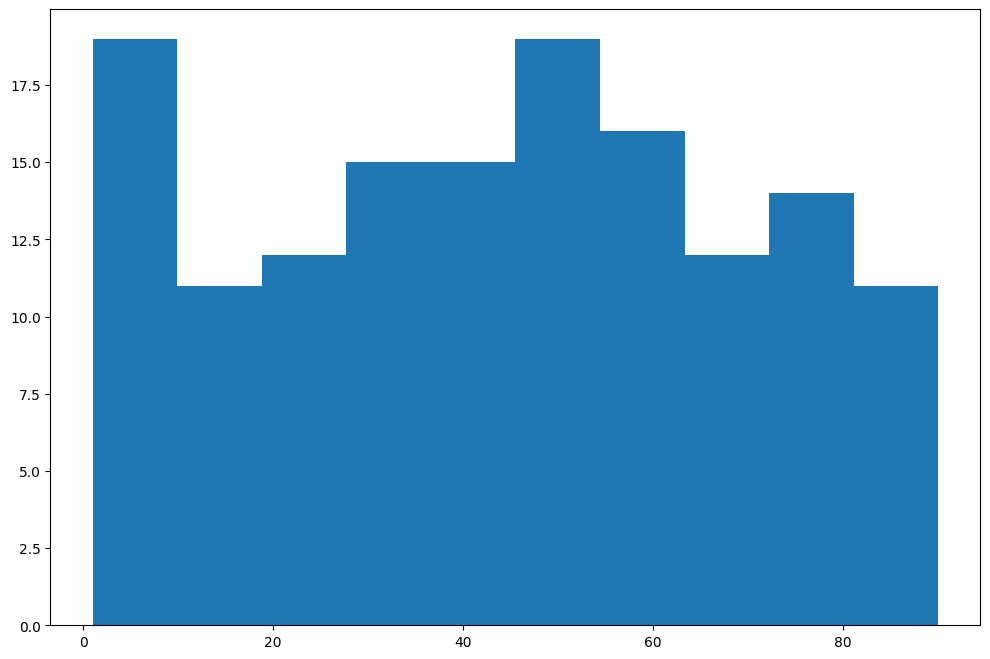

In [15]:
counts, bins = np.histogram(fails_dif)
plt.figure(figsize=(12,8))
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

select the HDD's that have more than 10 days of intervel before the failure observed.

In [16]:
fails_dif_ordered = fails_dif[::-1]

models = [features for (features, i) in zip(df[df['failure'] == 1].serial_number.values, range(0, len(df[df['failure'] == 1].index.values))) if fails_dif[i]>10]

In [17]:
final_df = df[df.serial_number.isin(models)]
final_df.reset_index(inplace=True, drop=True)

In [18]:
final_df.head()

,date,serial_number,failure,Read_Error_Rate,Start_Stop_Count,Reallocated_Sectors_Count,Seek_Error_Rate,Power-On_Hours,Reported_Uncorrectable_Errors,Command_Timeout,Temperature_Difference,Power-off_Retract_Count,Load_Unload_Cycle,Current_Pending_Sector_Count,UltraDMA_CRC_Error_Count,Head_Flying_Hours
0,2024-01-01,ZHZ0N19K,0.0,0.623688,0.003186,0.0,0.000616,0.938627,0.0,0.0,0.483871,0.534639,0.194409,0.0,0.0,0.935705
1,2024-01-02,ZHZ0N19K,0.0,0.217878,0.003186,0.0,0.000624,0.939420,0.0,0.0,0.516129,0.536145,0.194590,0.0,0.0,0.936503
2,2024-01-03,ZHZ0N19K,0.0,0.051171,0.003186,0.0,0.000629,0.939804,0.0,0.0,0.516129,0.536145,0.194590,0.0,0.0,0.936915
3,2024-01-04,ZHZ0N19K,0.0,0.047147,0.003186,0.0,0.000639,0.940623,0.0,0.0,0.451613,0.536145,0.194860,0.0,0.0,0.937712
4,2024-01-05,ZHZ0N19K,0.0,0.048253,0.003186,0.0,0.000648,0.941006,0.0,0.0,0.419355,0.536145,0.194860,0.0,0.0,0.938124


In [19]:
final_df.to_csv("/nobackup/amimalik/bits-proj/dataset/dimensions/prepared_dataset.csv", index=False)